In [1]:
# The code was removed by Watson Studio for sharing.

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-01-23T14:46:02.000,45459574,HEAT/HOT WATER,11208.0,54 ELDERT LANE,ELDERT LANE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.689998,-73.867822,NaN,RESIDENTIAL BUILDING,Open
1,2020-01-23T05:05:12.000,45459581,HEAT/HOT WATER,10463.0,3805 REVIEW PLACE,REVIEW PLACE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.884961,-73.899639,NaN,RESIDENTIAL BUILDING,Open
2,2020-01-23T15:51:43.000,45460622,HEAT/HOT WATER,10467.0,3280 ROCHAMBEAU AVENUE,ROCHAMBEAU AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.877404,-73.880713,NaN,RESIDENTIAL BUILDING,Open
3,2020-01-23T18:28:57.000,45459699,PAINT/PLASTER,10033.0,427 FT WASHINGTON AVENUE,FT WASHINGTON AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.849395,-73.938903,NaN,RESIDENTIAL BUILDING,Open
4,2020-01-23T18:42:16.000,45460666,HEAT/HOT WATER,10459.0,1304 REV JAMES POLITE AVENUE,REV JAMES POLITE AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.830102,-73.895252,NaN,RESIDENTIAL BUILDING,Open


In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,24,25,26,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

Lets first work on 311 data set, collecting only data entries where complaint type is HEATING and HEAT/HOT WATER identified in problem 1

In [5]:
df_data_main['complaint_type'] = np.where(df_data_main['complaint_type']=='HEATING','HEAT/HOT WATER', df_data_main['complaint_type'])
df_data_main['complaint_type'].value_counts()

HEAT/HOT WATER            2143188
PLUMBING                   710635
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       450898
PAINT - PLASTER            361257
PAINT/PLASTER              346192
ELECTRIC                   307098
NONCONST                   260890
DOOR/WINDOW                204964
WATER LEAK                 193333
GENERAL                    151087
FLOORING/STAIRS            137291
APPLIANCE                  112659
HPD Literature Request      52830
SAFETY                      51445
OUTSIDE BUILDING             7129
ELEVATOR                     6715
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Electric                        1
Mold                            1
Name: complain

Lets drop those rows where address is no available.

In [6]:
df_data_main = df_data_main[(df_data_main['complaint_type'] == 'HEAT/HOT WATER') & ((df_data_main['borough'] == 'BROOKLYN')|(df_data_main['borough'] == 'BRONX'))]
print(df_data_main['incident_address'].isnull().sum())
df_data_main.dropna(subset=['incident_address'],inplace=True)

1


In [7]:
print(df_data_main['incident_address'].isnull().sum())

0


In [8]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,24,25,26,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
print(df_data_BK.shape)
print(df_data_BX.shape)

(277316, 87)
(89854, 87)


As we can see, 87 columns are present in this dataset, we will only select the recommended columns to reduces unnecessary data and memory usage.

In [11]:
df_data_BK = df_data_BK[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 
                         'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 
                         'ZipCode', 'YCoord', 'XCoord']]
df_data_BX = df_data_BX[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 
                         'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 
                         'ZipCode', 'YCoord', 'XCoord']]

As we can see, 87 columns are present in this dataset, we will only select the recommended columns to reduces unnecessary data and memory usage.
Address is a common thread between all 311 dataset and pluto data sets for BX nad BK. We need to merge this dataset based upon address to continue our analysis.
Also lets drop rows from both df_data_BK and df_data_BX where Address values are null as those will be of no use in our analysis

Also lets drop rows where address is null in df_data_BK and df_data_BX

For BX dataset:

In [12]:
print(df_data_BX['Address'].isnull().sum())
df_data_BX.dropna(subset=['Address'],inplace=True)
print(df_data_BX['Address'].isnull().sum())
print(len(df_data_BX['Address']))

69
0
89785


For BK dataset:

In [13]:
print(df_data_BK['Address'].isnull().sum())
df_data_BK.dropna(subset=['Address'],inplace=True)
print(df_data_BK['Address'].isnull().sum())
print(len(df_data_BK['Address']))

183
0
277133


In [14]:
#Lets calculate total number of complaints from a particular address in 311 dataset
df_data_main_group = df_data_main.groupby(['incident_address']).count()
df_data_main_group.rename(columns={"complaint_type": "complaint_count"}, inplace=True)
df_data_main_group = df_data_main_group[['complaint_count']]
df_data_main_group.head()

,complaint_count
incident_address,
1 12 STREET,1
1 43 STREET,1
1 74 STREET,31
1 ADRIAN AVENUE,39
1 ALBEMARLE ROAD,2


In [15]:
print(df_data_BX['Address'].value_counts())

SHORE DRIVE                 42
PALISADE AVENUE             37
WHITE PLAINS ROAD           35
PARK AVENUE                 35
BRUCKNER BOULEVARD          34
MAJ WM DEEGAN BLVD          32
WEST 246 STREET             29
SEDGWICK AVENUE             27
POST ROAD                   22
UNIVERSITY AVENUE           21
3 AVENUE                    21
BRONX RIVER AVENUE          20
WESTCHESTER AVENUE          20
WEBSTER AVENUE              20
JEROME AVENUE               19
RANDALL AVENUE              19
BOSTON ROAD                 19
FIELDSTON ROAD              19
CROSS BRONX EXPWY           18
CITY ISLAND AVENUE          18
PAULDING AVENUE             18
BAYCHESTER AVENUE           18
INDEPENDENCE AVENUE         17
EAST TREMONT AVENUE         16
KING AVENUE                 16
CORNELL AVENUE              16
VAN NEST AVENUE             16
HEATH AVENUE                15
LAFAYETTE AVENUE            15
EAST 213 STREET             15
                            ..
365 MORRIS PARK AVENUE       1
928 BRIN

We can see multiple entries from same address in pluto datasets for Bronx, Lets drop the duplicate addresses from both df_data_BX and df_data_BK

In [16]:
df_data_BX.drop_duplicates(subset=['Address'], inplace=True)
df_data_BK.drop_duplicates(subset=['Address'], inplace=True)

Check if all duplicates has been droped correctly

In [17]:
print(len(df_data_BX['Address']) == len(df_data_BX['Address'].unique())) 
print(len(df_data_BK['Address']) == len(df_data_BK['Address'].unique())) 

True
True


# We will consider three scenerios after this, 
1.Merge only df_data_BX and df_data_main_group<br>
2.Merge only df_data_BK and df_data_main_group<br>
3.Merge both df_data_BX and df_data_BK with df_data_main_group

# Scenerio 1

In [18]:
df_analyse_BX = pd.merge(left=df_data_main_group,right=df_data_BX, left_on='incident_address', right_on='Address',how='right')
df_analyse_BX['Age'] = 2020 - df_analyse_BX['YearBuilt']

In [19]:
df_analyse_BX['YCoord'] = df_analyse_BX.YCoord.fillna(0.0).astype(float)
df_analyse_BX['XCoord'] = df_analyse_BX.XCoord.fillna(0.0).astype(float)
df_analyse_BX['ZipCode'] = df_analyse_BX.ZipCode.fillna(0).astype(int)
df_analyse_BX['complaint_count'] = df_analyse_BX.complaint_count.fillna(0).astype(int)
df_analyse_BX['Age'] = df_analyse_BX.Age.fillna(0).astype(int)

In [20]:
df_analyse_BX.isnull().sum()

complaint_count    0
Address            0
BldgArea           0
BldgDepth          0
BuiltFAR           0
CommFAR            0
FacilFAR           0
Lot                0
LotArea            0
LotDepth           0
NumBldgs           0
NumFloors          0
OfficeArea         0
ResArea            0
ResidFAR           0
RetailArea         0
YearBuilt          0
YearAlter1         0
ZipCode            0
YCoord             0
XCoord             0
Age                0
dtype: int64

In [21]:
def plot_heatmap(df_analyse):
    plt.figure(figsize=(20,10))
    df_corr = df_analyse.corr(method='pearson')
    sns.heatmap(df_corr, annot = True, cmap=plt.cm.Reds)
    plt.show()
    
def get_targetfeatures(df_corr, threshold):
    complaint_count = abs(df_corr["complaint_count"])
    target_features = complaint_count[complaint_count >= threshold] 
    return target_features

def get_corr(df_analyse):
    return df_analyse.corr(method='pearson')

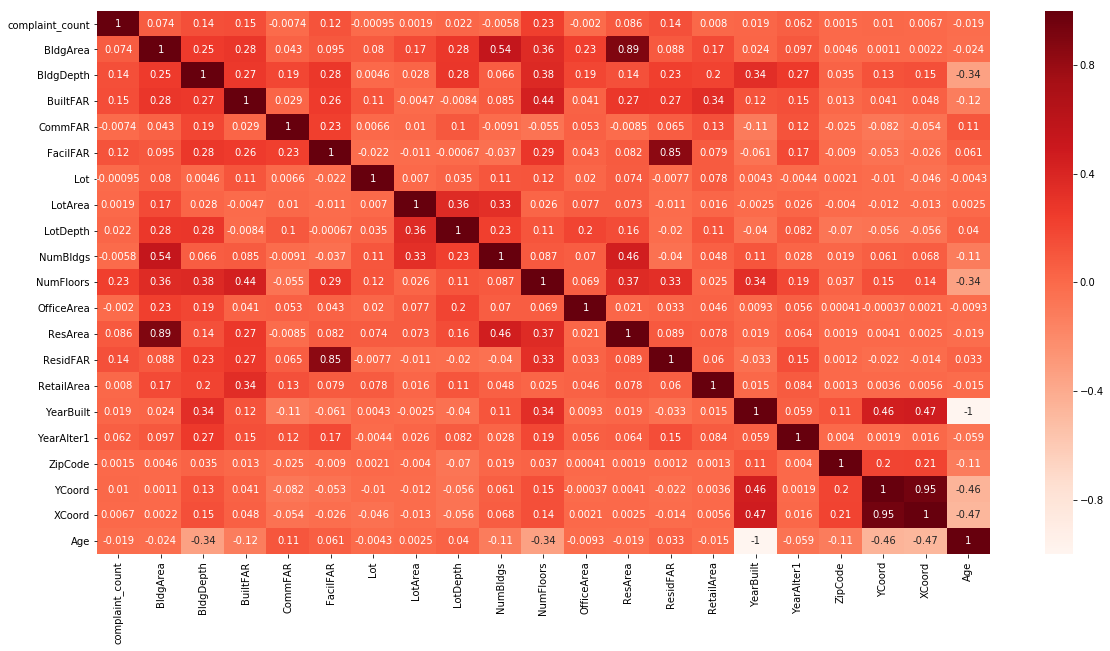

In [22]:
plot_heatmap(df_analyse_BX)

In [23]:
get_targetfeatures(get_corr(df_analyse_BX),0.14) 

complaint_count    1.000000
BldgDepth          0.144982
BuiltFAR           0.151687
NumFloors          0.226628
Name: complaint_count, dtype: float64

Lets drop the rows where complaint_count is equal to 0 and recalculate the correlation coefficients.

In [24]:
df_analyse_BX_1 = df_analyse_BX[df_analyse_BX['complaint_count'] != 0]
df_analyse_BX_1.shape

(17317, 22)

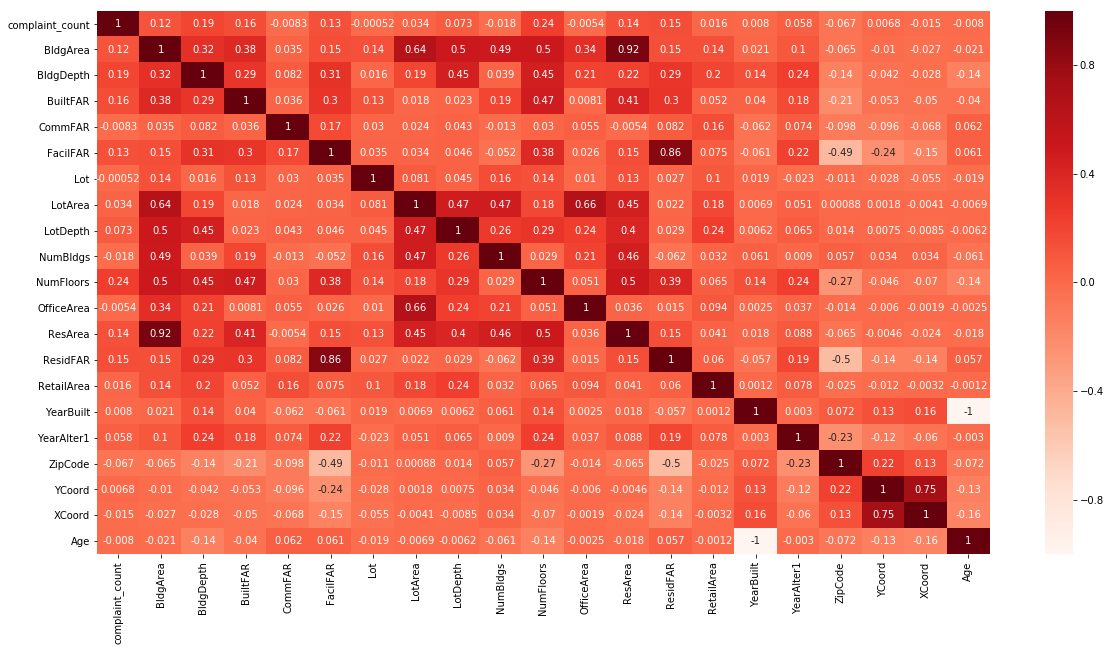

In [25]:
plot_heatmap(df_analyse_BX_1)

In [26]:
get_targetfeatures(get_corr(df_analyse_BX_1), 0.14)

complaint_count    1.000000
BldgDepth          0.194250
BuiltFAR           0.157411
NumFloors          0.241491
ResArea            0.140566
ResidFAR           0.149473
Name: complaint_count, dtype: float64

### Number of floors feature has higher correlation coefficent in both cases, Will conclude that from BX pluto set BldgDepth,BuiltFAR,NumFloors are the features to be important         

# Scenerio 2

Lets find correlation coefficients with Borough as Brooklyn

In [27]:
df_analyse_BK = pd.merge(left=df_data_main_group,right=df_data_BK, left_on='incident_address', right_on='Address',how='right')
df_analyse_BK['Age'] = 2020 - df_analyse_BK['YearBuilt']

In [28]:
df_analyse_BK.isnull().sum()

complaint_count    235386
Address                 0
BldgArea                0
BldgDepth               0
BuiltFAR                0
CommFAR                 0
FacilFAR                0
Lot                     0
LotArea                 0
LotDepth                0
NumBldgs                0
NumFloors               0
OfficeArea              0
ResArea                 0
ResidFAR                0
RetailArea              0
YearBuilt               0
YearAlter1              0
ZipCode               133
YCoord               1248
XCoord               1248
Age                     0
dtype: int64

In [29]:
df_analyse_BK['YCoord'] = df_analyse_BK.YCoord.fillna(0.0).astype(float)
df_analyse_BK['XCoord'] = df_analyse_BK.XCoord.fillna(0.0).astype(float)
df_analyse_BK['ZipCode'] = df_analyse_BK.ZipCode.fillna(0).astype(int)
df_analyse_BK['complaint_count'] = df_analyse_BK.complaint_count.fillna(0).astype(int)
df_analyse_BK['Age'] = df_analyse_BK.Age.fillna(0).astype(int)

In [30]:
df_analyse_BK.isnull().sum()

complaint_count    0
Address            0
BldgArea           0
BldgDepth          0
BuiltFAR           0
CommFAR            0
FacilFAR           0
Lot                0
LotArea            0
LotDepth           0
NumBldgs           0
NumFloors          0
OfficeArea         0
ResArea            0
ResidFAR           0
RetailArea         0
YearBuilt          0
YearAlter1         0
ZipCode            0
YCoord             0
XCoord             0
Age                0
dtype: int64

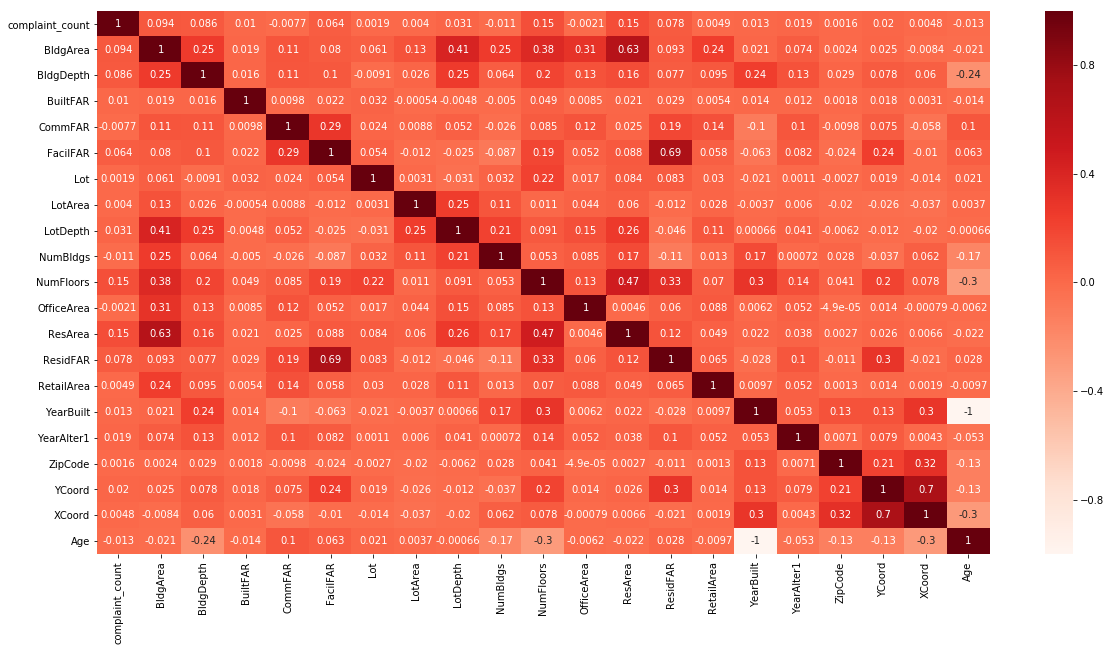

In [31]:
plot_heatmap(df_analyse_BK)

If we set same threshold of 0.14 as before 

In [32]:
get_targetfeatures(get_corr(df_analyse_BK), 0.14)

complaint_count    1.000000
NumFloors          0.147265
ResArea            0.154822
Name: complaint_count, dtype: float64

Lets drop the rows where complaint_count is equal to 0 and recalculate the correlation coefficients.

In [33]:
df_analyse_BK_1 = df_analyse_BK[df_analyse_BK['complaint_count'] != 0]
df_analyse_BK_1.shape

(36752, 22)

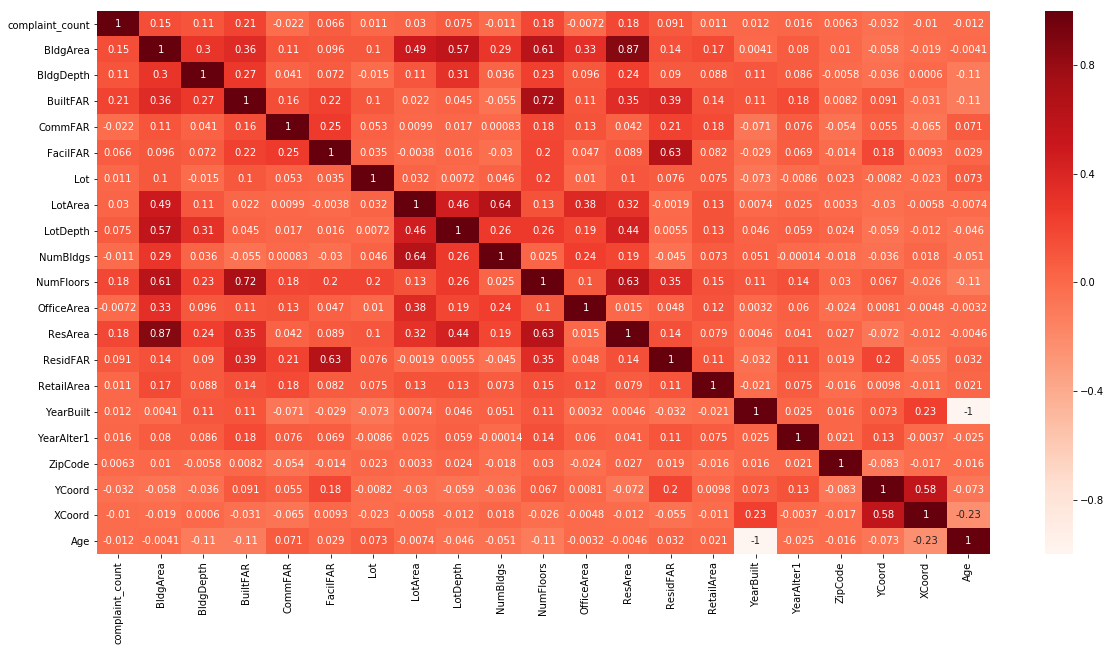

In [34]:
plot_heatmap(df_analyse_BK_1)

In [35]:
get_targetfeatures(get_corr(df_analyse_BK_1), 0.14)

complaint_count    1.000000
BldgArea           0.150993
BuiltFAR           0.205105
NumFloors          0.181214
ResArea            0.181556
Name: complaint_count, dtype: float64

### Number of floors and Residence area exists in both cases BuiltFAR has almost 0.20 coeffiecient when 0 number of complaints rows are dropped , Will conclude that from BK pluto set ResArea,BuiltFAR,NumFloors are the important features.        

# Scenerio 3

Lets concatenate df_analyse_BK and df_analyse_BX and then merge with df_data_main_group

In [36]:
df_BKBX = pd.concat([df_analyse_BK,df_analyse_BX], ignore_index=False, axis=0, sort = True)
df_BKBX.isnull().sum()

Address            0
Age                0
BldgArea           0
BldgDepth          0
BuiltFAR           0
CommFAR            0
FacilFAR           0
Lot                0
LotArea            0
LotDepth           0
NumBldgs           0
NumFloors          0
OfficeArea         0
ResArea            0
ResidFAR           0
RetailArea         0
XCoord             0
YCoord             0
YearAlter1         0
YearBuilt          0
ZipCode            0
complaint_count    0
dtype: int64

In [37]:
print(len(df_BKBX) == (len(df_analyse_BK) + len(df_data_BX)))

True


In [38]:
# We dont have to merge here as df_analyse_BK and df_analyse_BX already have complaint count values
df_BKBX.head()

,Address,Age,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,OfficeArea,ResArea,ResidFAR,RetailArea,XCoord,YCoord,YearAlter1,YearBuilt,ZipCode,complaint_count
0,1 74 STREET,82,112140,294.00,3.36,0.0,3.0,1,33400,294.00,...,0,112140,3.00,0,974216.0,170478.0,0,1938,11209,31
1,1 ALBEMARLE ROAD,90,67200,182.00,0.99,0.0,2.0,32,68000,340.00,...,0,0,1.25,0,989656.0,174490.0,2008,1930,11218,2
2,1 BAY RIDGE PARKWAY,50,5193,44.00,2.10,0.0,2.0,50,2474,60.33,...,1799,3394,0.90,0,974089.0,170174.0,0,1970,11209,1
3,1 CAMPUS PLACE,100,1588,36.00,0.85,0.0,2.0,38,1858,75.08,...,0,1588,1.25,0,1019672.0,188669.0,0,1920,11208,1
4,1 CARLTON AVENUE,63,71071,163.42,1.89,2.0,4.8,16,37564,163.42,...,0,0,0.00,0,991656.0,193395.0,1995,1957,11205,1


In [39]:
df_BKBX.isnull().sum()

Address            0
Age                0
BldgArea           0
BldgDepth          0
BuiltFAR           0
CommFAR            0
FacilFAR           0
Lot                0
LotArea            0
LotDepth           0
NumBldgs           0
NumFloors          0
OfficeArea         0
ResArea            0
ResidFAR           0
RetailArea         0
XCoord             0
YCoord             0
YearAlter1         0
YearBuilt          0
ZipCode            0
complaint_count    0
dtype: int64

In [40]:
df_BKBX['Age'] = df_BKBX.Age.fillna(0).astype(int)
df_BKBX.isnull().sum()

Address            0
Age                0
BldgArea           0
BldgDepth          0
BuiltFAR           0
CommFAR            0
FacilFAR           0
Lot                0
LotArea            0
LotDepth           0
NumBldgs           0
NumFloors          0
OfficeArea         0
ResArea            0
ResidFAR           0
RetailArea         0
XCoord             0
YCoord             0
YearAlter1         0
YearBuilt          0
ZipCode            0
complaint_count    0
dtype: int64

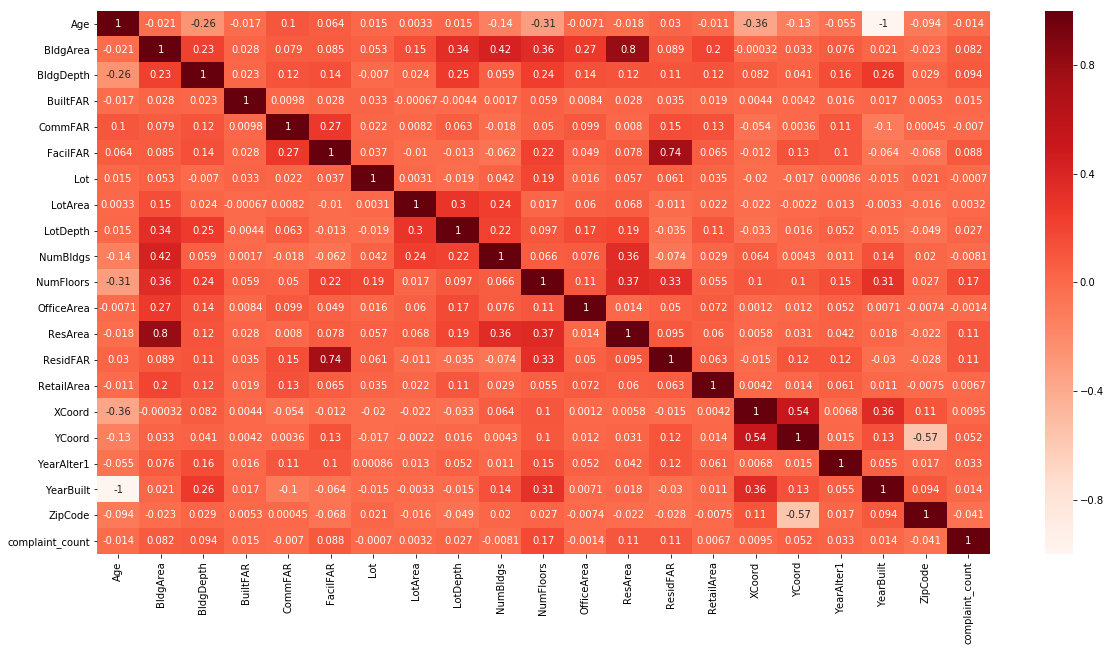

In [41]:
plot_heatmap(df_BKBX)

In [42]:
get_targetfeatures(get_corr(df_BKBX), 0.14)

NumFloors          0.172978
complaint_count    1.000000
Name: complaint_count, dtype: float64

In [43]:
df_BKBX_1 = df_BKBX[df_BKBX['complaint_count'] != 0]

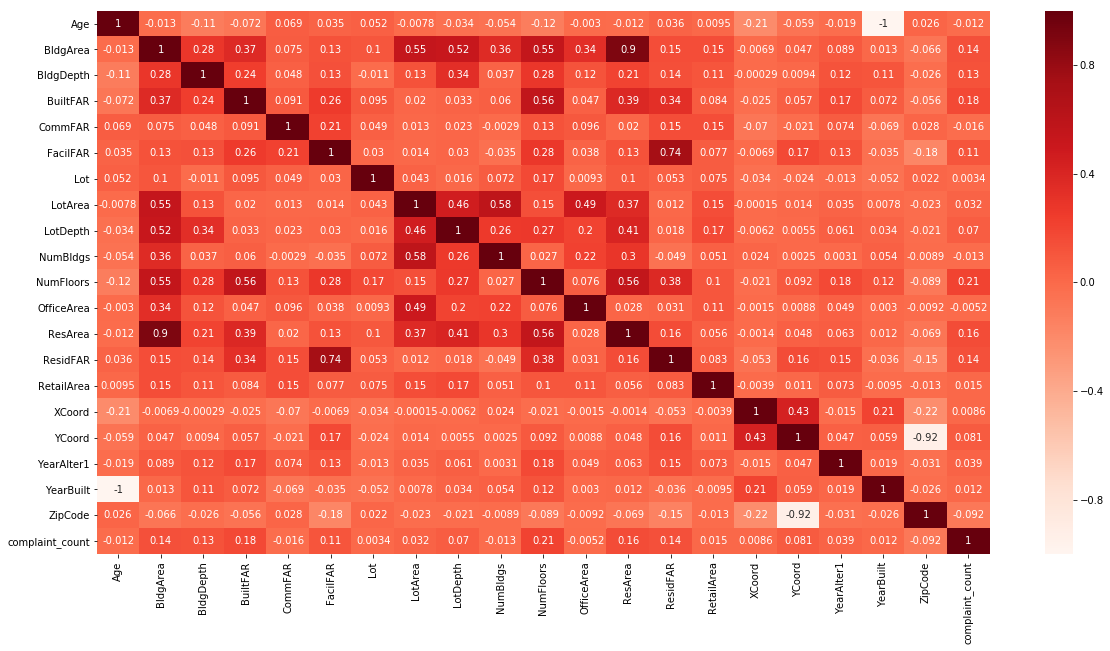

In [44]:
plot_heatmap(df_BKBX_1)

In [45]:
get_targetfeatures(get_corr(df_BKBX_1), 0.14)

BuiltFAR           0.175961
NumFloors          0.210907
ResArea            0.159000
complaint_count    1.000000
Name: complaint_count, dtype: float64

### Number of floors exists in both cases BuiltFAR has almost 0.17 coeffiecient when zero number of complaints rows are dropped , Will conclude that from  ResArea,BuiltFAR,NumFloors are the important features from this.       

## From all three cases we can say that ResArea,BuiltFAR,NumFloors and BldgDepth are some feautures who have comparaively stronger relationship as compared to other housing characterstics

In [46]:
count_df = pd.DataFrame(df_BKBX_1.groupby(by='complaint_count').count()['Address'])
count_df.rename(columns={"Address": "count_values"}, inplace=True) 
# count_df = count_df[count_df['count_values'] < 50]
# count_df.head()
# count_df['count_values'].max()

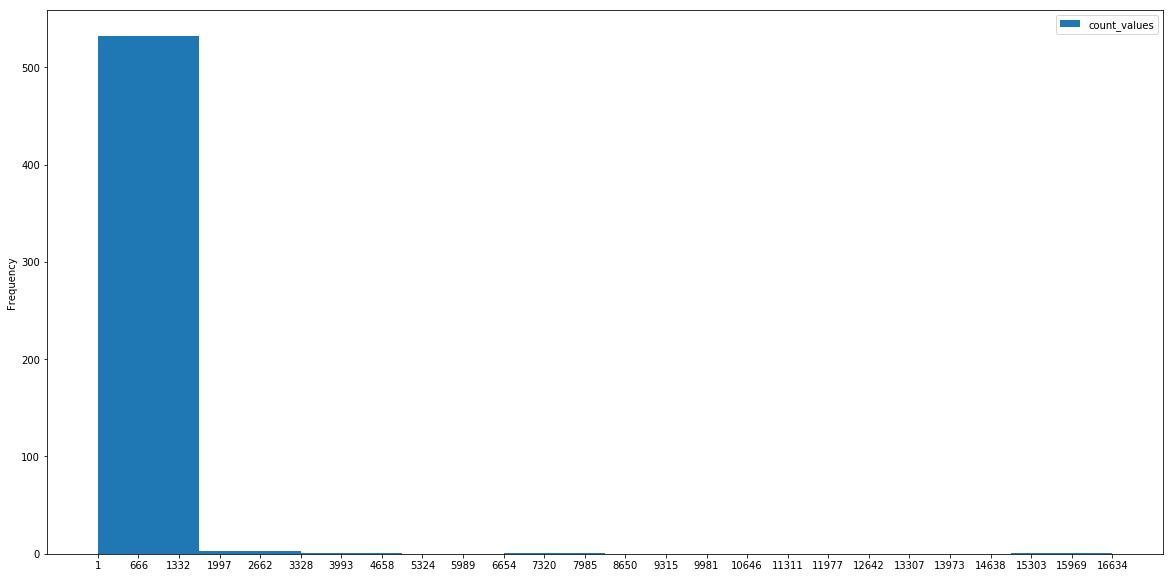

In [47]:
count, bin_edges = np.histogram(count_df, bins=25)
count_df.plot(kind='hist', figsize=(20, 10) , xticks=bin_edges)

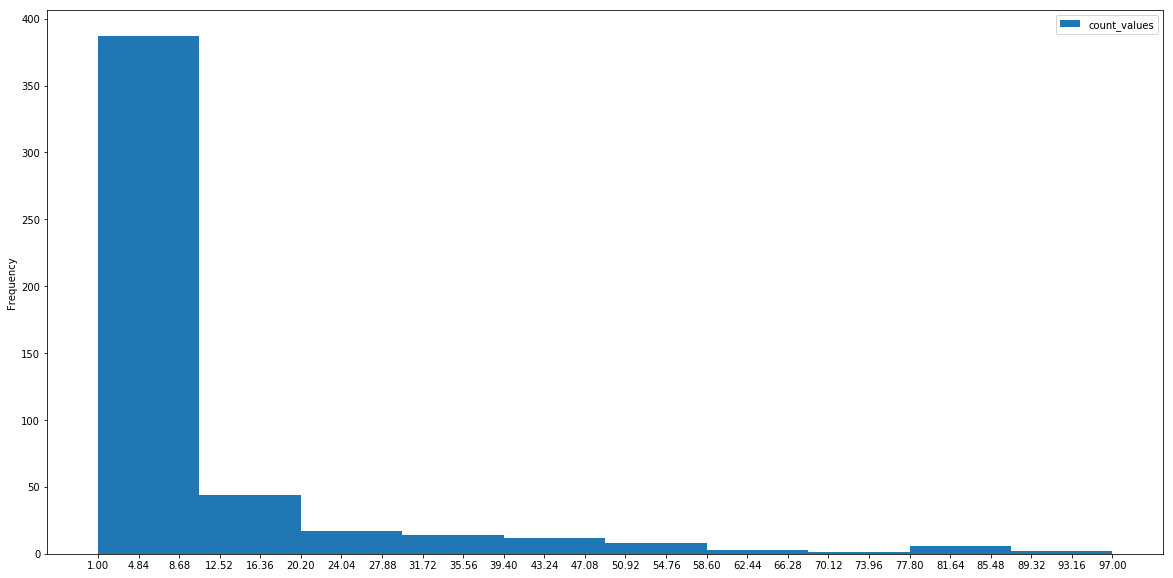

In [48]:
count_df = count_df[count_df['count_values'] < 100]
count, bin_edges = np.histogram(count_df, bins=25)
count_df.plot(kind='hist', figsize=(20, 10) , xticks=bin_edges)

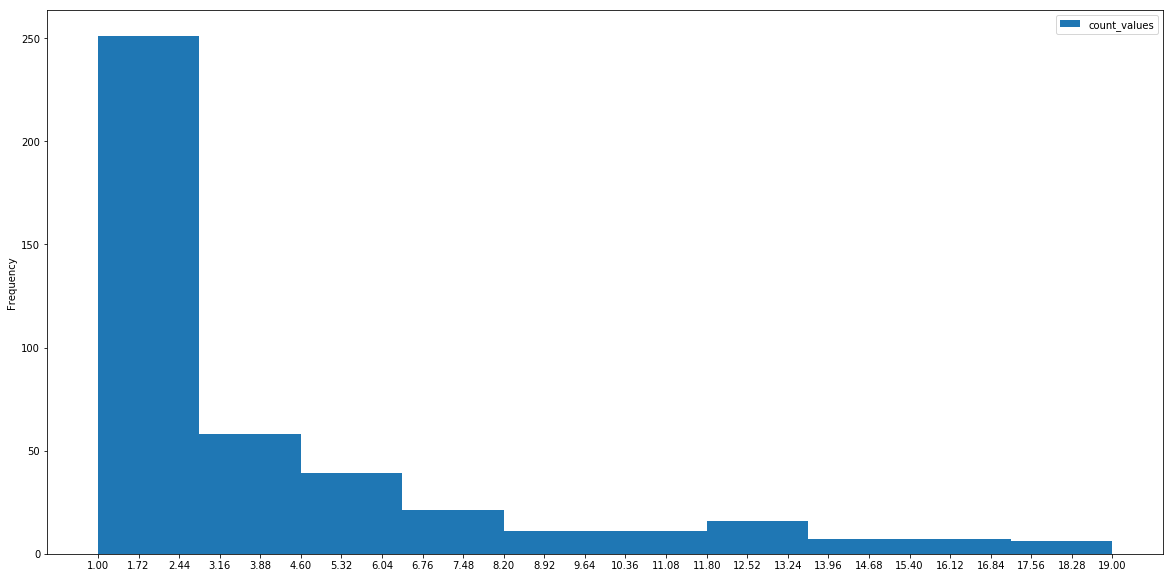

In [49]:
count_df = count_df[count_df['count_values'] < 20]
count, bin_edges = np.histogram(count_df, bins=25)
count_df.plot(kind='hist', figsize=(20, 10) , xticks=bin_edges)

Based upon above histograms we can divide the complaint_counts into 4 groups<br>
Group-0 : 1-4 complaint_count<br>
Group-1 : 4-10 complaint_count<br>
Group-2 : 10-50 complaint_count<br>
Group-3 : 50-100 complaint_count<br>
Group-4 : 100 and above complaint_count<br>

In [50]:
def group_decider(count):
    if count <= 4:
        complaint_group = 'Group-0'
    elif count > 4 and count <= 10:
        complaint_group = 'Group-1'
    elif count > 10 and count <= 50:
        complaint_group = 'Group-2'
    elif count > 50 and count <= 100:
        complaint_group = 'Group-3'
    elif count > 100:
        complaint_group = 'Group-4'
    return complaint_group

In [51]:
df_BKBX_1['complaint_group'] = df_BKBX_1['complaint_count'].apply(lambda x : group_decider(x))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [52]:
df_BKBX_1.head()

,Address,Age,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,ResArea,ResidFAR,RetailArea,XCoord,YCoord,YearAlter1,YearBuilt,ZipCode,complaint_count,complaint_group
0,1 74 STREET,82,112140,294.00,3.36,0.0,3.0,1,33400,294.00,...,112140,3.00,0,974216.0,170478.0,0,1938,11209,31,Group-2
1,1 ALBEMARLE ROAD,90,67200,182.00,0.99,0.0,2.0,32,68000,340.00,...,0,1.25,0,989656.0,174490.0,2008,1930,11218,2,Group-0
2,1 BAY RIDGE PARKWAY,50,5193,44.00,2.10,0.0,2.0,50,2474,60.33,...,3394,0.90,0,974089.0,170174.0,0,1970,11209,1,Group-0
3,1 CAMPUS PLACE,100,1588,36.00,0.85,0.0,2.0,38,1858,75.08,...,1588,1.25,0,1019672.0,188669.0,0,1920,11208,1,Group-0
4,1 CARLTON AVENUE,63,71071,163.42,1.89,2.0,4.8,16,37564,163.42,...,0,0.00,0,991656.0,193395.0,1995,1957,11205,1,Group-0


In [53]:
df_BKBX_1.groupby(by='complaint_group').count()

,Address,Age,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,OfficeArea,ResArea,ResidFAR,RetailArea,XCoord,YCoord,YearAlter1,YearBuilt,ZipCode,complaint_count
complaint_group,,,,,,,,,,,,,,,,,,,,,
Group-0,31925,31925,31925,31925,31925,31925,31925,31925,31925,31925,...,31925,31925,31925,31925,31925,31925,31925,31925,31925,31925
Group-1,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,...,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817
Group-2,9363,9363,9363,9363,9363,9363,9363,9363,9363,9363,...,9363,9363,9363,9363,9363,9363,9363,9363,9363,9363
Group-3,2077,2077,2077,2077,2077,2077,2077,2077,2077,2077,...,2077,2077,2077,2077,2077,2077,2077,2077,2077,2077
Group-4,1887,1887,1887,1887,1887,1887,1887,1887,1887,1887,...,1887,1887,1887,1887,1887,1887,1887,1887,1887,1887


We will now make use of Random Forest classifier algorithm to get feature importance of different housing characteristics. We will try to classify a entry into either of these group using random forest classifier model.

In [54]:
df_BKBX_1.columns

Index(['Address', 'Age', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
       'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors',
       'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'XCoord', 'YCoord',
       'YearAlter1', 'YearBuilt', 'ZipCode', 'complaint_count',
       'complaint_group'],
      dtype='object')

In [55]:
df_BKBX_1.isnull().sum()

Address            0
Age                0
BldgArea           0
BldgDepth          0
BuiltFAR           0
CommFAR            0
FacilFAR           0
Lot                0
LotArea            0
LotDepth           0
NumBldgs           0
NumFloors          0
OfficeArea         0
ResArea            0
ResidFAR           0
RetailArea         0
XCoord             0
YCoord             0
YearAlter1         0
YearBuilt          0
ZipCode            0
complaint_count    0
complaint_group    0
dtype: int64

let's drop some unnecessary columns to make data-frame more sensible.

In [56]:
df_random = df_BKBX_1.drop(columns=['complaint_count','YearAlter1','YearBuilt','Address'])
df_random.head()

,Age,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,XCoord,YCoord,ZipCode,complaint_group
0,82,112140,294.00,3.36,0.0,3.0,1,33400,294.00,1,6.0,0,112140,3.00,0,974216.0,170478.0,11209,Group-2
1,90,67200,182.00,0.99,0.0,2.0,32,68000,340.00,2,4.0,0,0,1.25,0,989656.0,174490.0,11218,Group-0
2,50,5193,44.00,2.10,0.0,2.0,50,2474,60.33,1,2.0,1799,3394,0.90,0,974089.0,170174.0,11209,Group-0
3,100,1588,36.00,0.85,0.0,2.0,38,1858,75.08,1,2.0,0,1588,1.25,0,1019672.0,188669.0,11208,Group-0
4,63,71071,163.42,1.89,2.0,4.8,16,37564,163.42,9,6.0,0,0,0.00,0,991656.0,193395.0,11205,Group-0


# Random Forest Classifier

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [58]:
y_data = df_random['complaint_group']
x_data = df_random.drop(['complaint_group'], axis = 1)

In [59]:
x_data.head()

,Age,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,XCoord,YCoord,ZipCode
0,82,112140,294.00,3.36,0.0,3.0,1,33400,294.00,1,6.0,0,112140,3.00,0,974216.0,170478.0,11209
1,90,67200,182.00,0.99,0.0,2.0,32,68000,340.00,2,4.0,0,0,1.25,0,989656.0,174490.0,11218
2,50,5193,44.00,2.10,0.0,2.0,50,2474,60.33,1,2.0,1799,3394,0.90,0,974089.0,170174.0,11209
3,100,1588,36.00,0.85,0.0,2.0,38,1858,75.08,1,2.0,0,1588,1.25,0,1019672.0,188669.0,11208
4,63,71071,163.42,1.89,2.0,4.8,16,37564,163.42,9,6.0,0,0,0.00,0,991656.0,193395.0,11205


In [60]:
y_data.head()

0    Group-2
1    Group-0
2    Group-0
3    Group-0
4    Group-0
Name: complaint_group, dtype: object

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, random_state=42)
y_train

1179     Group-0
900      Group-0
20660    Group-1
1918     Group-0
1801     Group-1
30250    Group-0
16584    Group-0
19313    Group-0
36549    Group-0
34605    Group-0
16300    Group-0
2274     Group-0
8972     Group-0
20259    Group-0
27683    Group-0
13443    Group-0
11082    Group-1
9112     Group-4
1047     Group-0
623      Group-0
30667    Group-0
22848    Group-0
8708     Group-2
6186     Group-0
2043     Group-0
13098    Group-1
9653     Group-2
14137    Group-0
4093     Group-0
6444     Group-3
          ...   
2747     Group-0
18431    Group-2
18942    Group-2
25658    Group-0
4682     Group-0
27480    Group-0
6396     Group-0
28693    Group-0
19769    Group-2
16955    Group-0
17568    Group-0
2436     Group-0
1067     Group-2
5311     Group-0
2433     Group-1
769      Group-0
1685     Group-0
4338     Group-0
16023    Group-0
7379     Group-4
10439    Group-2
21962    Group-0
442      Group-1
16850    Group-0
6265     Group-0
11284    Group-3
7980     Group-1
1406     Group

In [68]:
steps = [('scaler', StandardScaler()),('rf_model', RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0))]
pipe = Pipeline(steps)

In [69]:
rf= pipe.fit(x_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [70]:
y_pred = pipe.predict(x_test)
y_pred

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array(['Group-0', 'Group-0', 'Group-0', ..., 'Group-0', 'Group-0',
       'Group-2'], dtype=object)

In [71]:
results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, y_pred)) 
print('Report : ')
print(classification_report(y_test, y_pred)) 

Confusion Matrix :
[[9209    0  392    0    0]
 [2260    0  375    0    0]
 [1751    0 1020    0    0]
 [ 184    0  448    0    0]
 [  76    0  506    0    0]]
Accuracy Score : 0.6306023056531657
Report : 
              precision    recall  f1-score   support

     Group-0       0.68      0.96      0.80      9601
     Group-1       0.00      0.00      0.00      2635
     Group-2       0.37      0.37      0.37      2771
     Group-3       0.00      0.00      0.00       632
     Group-4       0.00      0.00      0.00       582

   micro avg       0.63      0.63      0.63     16221
   macro avg       0.21      0.27      0.23     16221
weighted avg       0.47      0.63      0.54     16221



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
model = rf.steps[1][1]

In [73]:
model.feature_importances_

array([3.93331711e-03, 2.13242623e-01, 6.37484337e-02, 1.40933268e-01,
       0.00000000e+00, 2.91873358e-03, 2.58284812e-04, 9.16570785e-02,
       4.75759869e-03, 0.00000000e+00, 1.47747839e-01, 5.27977458e-04,
       2.99505612e-01, 6.69549611e-03, 0.00000000e+00, 2.23510774e-03,
       8.18392249e-03, 1.36547085e-02])

In [74]:
x_train.columns.tolist()

['Age',
 'BldgArea',
 'BldgDepth',
 'BuiltFAR',
 'CommFAR',
 'FacilFAR',
 'Lot',
 'LotArea',
 'LotDepth',
 'NumBldgs',
 'NumFloors',
 'OfficeArea',
 'ResArea',
 'ResidFAR',
 'RetailArea',
 'XCoord',
 'YCoord',
 'ZipCode']

In [78]:
#Creating a table of feature, feature_importance, percentage_feature_importance
data = {'feature' : x_train.columns.tolist(), 'feature_importance' : model.feature_importances_}
df_table = pd.DataFrame(data = data)
total_importance = df_table['feature_importance'].sum(axis= 0)
df_table['percentage'] = df_table['feature_importance']/df_table['feature_importance'].sum(axis=0)
df_table.sort_values(by = 'percentage', ascending= False).head()


,feature,feature_importance,percentage
12,ResArea,0.481172,0.481172
10,NumFloors,0.053082,0.053082
3,BuiltFAR,0.049451,0.049451
0,Age,0.047408,0.047408
15,XCoord,0.047278,0.047278


# XGBoost Algorithm

In [76]:
steps = [('scaler', StandardScaler()),('xgb_model', XGBClassifier())]
pipe = Pipeline(steps)
xgb = pipe.fit(x_train, y_train)
model = xgb.steps[1][1]
print(model.feature_importances_)
print(x_train.columns.tolist())


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


[0.04740835 0.03260835 0.0330533  0.04945137 0.01500334 0.01602386
 0.02910845 0.04696718 0.01263732 0.01671753 0.05308156 0.01688012
 0.48117238 0.02638386 0.01429892 0.0472781  0.04033912 0.02158691]
['Age', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'XCoord', 'YCoord', 'ZipCode']


In [79]:
#Creating a table of feature, feature_importance, percentage_feature_importance
data = {'feature' : x_train.columns.tolist(), 'feature_importance' : model.feature_importances_}
df_table = pd.DataFrame(data = data)
total_importance = df_table['feature_importance'].sum(axis= 0)
df_table['percentage'] = df_table['feature_importance']/df_table['feature_importance'].sum(axis=0)
df_table.sort_values(by = 'percentage', ascending= False).head()

,feature,feature_importance,percentage
12,ResArea,0.481172,0.481172
10,NumFloors,0.053082,0.053082
3,BuiltFAR,0.049451,0.049451
0,Age,0.047408,0.047408
15,XCoord,0.047278,0.047278


From all Pearson correlation analysis, and feature importances obtained through Random Forest and XGBOOST we can collectively say:

# Following Housing characteristics have a strong relationship complaint type : HEAT/HOT  Water
1.ResArea<br>
2.NumFloors<br>
3.BuiltFAR<br>
4.BldgDepth<br>
5.Age